##**KLASIFIKASI GAMBAR SAYURAN MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK (CNN)**##
---
Anggota Kelompok :
1. Muhamad Aksyal Faiz Destian	(2210631250019)
2. Farrel Zaindri Althaf	(2210631250050)
3. Muhammad Dzakil Aqli	(2210631250062)
---
Convolutional Neural Network (CNN) adalah salah satu jenis deep learning yang populer untuk pemodelan klasifikasi gambar. CNN sangat efektif dalam mengenali objek pada gambar karena model dapat mempelajari fitur-fitur dari data gambar. CNN telah digunakan pada banyak aplikasi, seperti pengenalan wajah, pengenalan karakter tulisan tangan, serta klasifikasi objek.

Pada project ini dataset yang digunakan adalah data gambar dari 15 jenis sayuran. Dataset ini sudah tersusun dengan struktur yang rapi sehingga tidak diperlukan banyak pengaturan. Di dalam direktori data juga sudah tersusun dalam 3 subdirektori terpisah untuk data latih, validasi maupun data uji. Pada masing-masing subdirektori tersebut sudah terdapat 15 subdirektori berdasarkan 15 jenis sayuran.

# IMPORT DATASET

In [24]:
import kagglehub
misrakahmed_vegetable_image_dataset_path = kagglehub.dataset_download('misrakahmed/vegetable-image-dataset')

print('Data source import complete.')


Data source import complete.


## PENYIAPAN DATA GAMBAR

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

## 1.1. Penyiapan direktori dan Data

In [4]:
# inisiasi path data gambar
images_path = "/kaggle/input/vegetable-image-dataset/Vegetable Images"
train_path = "/train"
val_path = "/validation"
test_path = "/test"

In [5]:
# Check if the directory exists before scanning
full_train_path = images_path + train_path
if not os.path.isdir(full_train_path):
    print(f"Error: Directory not found - {full_train_path}")
else:
    subdirectories = [f.name for f in os.scandir(full_train_path) if f.is_dir()]

    print("Daftar nama subdirektori:")
    for subdir in subdirectories:
        print(subdir)

Daftar nama subdirektori:
Broccoli
Capsicum
Bottle_Gourd
Radish
Tomato
Brinjal
Pumpkin
Carrot
Papaya
Cabbage
Bitter_Gourd
Cauliflower
Bean
Cucumber
Potato


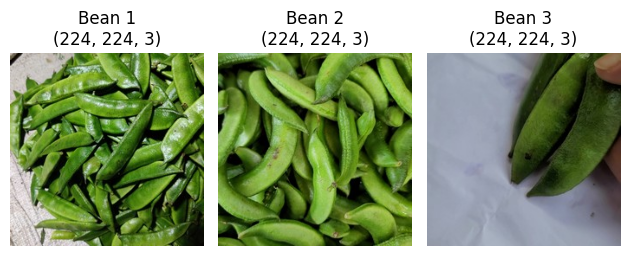

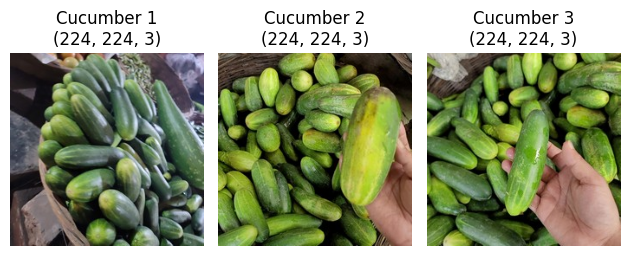

In [6]:
# fungsi untuk menampilkan gambar secara acak pada grid n_row x n_col
def view_random_image(data_dir, class_dir, n_row=1, n_col=1):

    # menentukan direktori gambar
    target_dir = data_dir + "/" + class_dir + "/"

    # memilih sebanyak n_row*n_col gambar secara acak
    rand_images = random.sample(os.listdir(target_dir), n_row*n_col)

    fig, axs = plt.subplots(n_row, n_col)

    # menampilkan gambar dalam bentuk grid ukuran n_row*n_col
    for i, ax in enumerate(axs.flat):
        img = mpimg.imread(target_dir + rand_images[i])
        ax.imshow(img)
        ax.set_title(f"{class_dir} {i+1}\n{img.shape}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# menampilkan contoh beberapa gambar acak dari direktori train
# Pass the full training path to the function
view_random_image(full_train_path, "Bean", 1, 3)
view_random_image(full_train_path, "Cucumber", 1, 3)

## 1.2. Image Data Generator

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
tf.random.set_seed(42)

# pengaturan data training dengan scaling images saja
# train_datagen = ImageDataGenerator(rescale=1.0 / 255)

# pengaturan data training dengan berbagai augmentasi
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# pengaturan data validasi selama pelatihan
val_datagen = ImageDataGenerator(rescale=1.0 /255)

# pengaturan data uji untuk evaluasi model
test_datagen = ImageDataGenerator(rescale=1.0 /255)

# menentukan ukuran gambar untuk proses pelatihan
img_size = (224, 224)

# menyiapkan data training dengan pengaturan yang sudah ditentukan
train_data = train_datagen.flow_from_directory(images_path + train_path,
                                               target_size=img_size,
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

 # menyiapkan data validasi
val_data = val_datagen.flow_from_directory(images_path + val_path,
                                           target_size=img_size,
                                           batch_size=32,
                                           class_mode='categorical',
                                           seed=42)

# menyiapkan data uji
test_data = test_datagen.flow_from_directory(images_path + test_path,
                                             target_size=img_size,
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [9]:
# menampilkan jumlah batch pada data train
print(f"Jumlah batch (training): {len(train_data)}")

# mengambil batch 1 data train
batch_1_train = train_data[0]

# setiap batch tersimpan dalam bentuk tupple
# elemen pertama menyimpan data piksel dari 32 gambar pada batch 1
batch_1_train_data = train_data[0][0]

# elemen kedua  menyimpan data label dari 32 gambar pada batch 1
batch_1_train_label = train_data[0][1]

# ukuran batch = 32 (sesuai pengaturan)
print(f"Jumlah gambar pada batch 1: {len(batch_1_train_data)}")
print(f"Jumlah label pada batch 1: {len(batch_1_train_label)}")

# mengambil gambar 1 pada batch 1 data training
image_1_batch_1_train_data = train_data[0][0][0]

# mengambil label (kelas) gambar 1 pada batch 1 data training
image_1_batch_1_train_label = train_data[0][1][0]

# menampilkan data gambar 1 : (224, 224, 3)
print(f"\nBatch 1 Gambar 1 train (data):\n{image_1_batch_1_train_data}")

# menampilkan data label (kelas) gambar 1 pada batch 1 data training
print(f"\nBatch 1 Gambar 1 train (Label):\n{image_1_batch_1_train_label}")

Jumlah batch (training): 469
Jumlah gambar pada batch 1: 32
Jumlah label pada batch 1: 32

Batch 1 Gambar 1 train (data):
[[[0.49021292 0.5921737  0.7294622 ]
  [0.4901961  0.5921569  0.7294118 ]
  [0.4901961  0.5921569  0.7294118 ]
  ...
  [0.6432631  0.7297891  0.89019614]
  [0.6468762  0.7406286  0.89019614]
  [0.6504894  0.74460703 0.8936267 ]]

 [[0.49387178 0.5958326  0.7404388 ]
  [0.49258798 0.5945488  0.7365875 ]
  [0.49130422 0.593265   0.7327361 ]
  ...
  [0.6445509  0.73365265 0.89019614]
  [0.6481641  0.74228173 0.89130133]
  [0.6509804  0.74669176 0.8949145 ]]

 [[0.49411768 0.59607846 0.7411765 ]
  [0.49411768 0.59607846 0.7411765 ]
  [0.49411768 0.59607846 0.7411765 ]
  ...
  [0.6458388  0.73751634 0.89019614]
  [0.649452   0.7435696  0.8925893 ]
  [0.6509804  0.7492675  0.8962024 ]]

 ...

 [[0.39611772 0.3725883  0.31768632]
  [0.3925045  0.3689751  0.31407315]
  [0.38236028 0.36536193 0.31699103]
  ...
  [0.5921569  0.7254902  0.91372555]
  [0.5921569  0.7254902  0.9

## MODEL CNN

## 2.1. Mebuat Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [11]:
# Cek apakah GPU terdeteksi
if tf.test.gpu_device_name():
    print(f"GPU detected: {tf.test.gpu_device_name()}")
else:
    print("No GPU detected")

GPU detected: /device:GPU:0


In [12]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(
    Conv2D(filters=20, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3))
)
model_1.add(Conv2D(20, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2), padding="valid"))

model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(15, activation="softmax"))  # number of neurons have to match number of class

# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)

# Fit the model
history_1 = model_1.fit(
        train_data,
        validation_data=val_data,
        epochs=10,
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 303s 627ms/step - accuracy: 0.4182 - loss: 1.7585 - val_accuracy: 0.7620 - val_loss: 0.7423
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 210s 449ms/step - accuracy: 0.7567 - loss: 0.7715 - val_accuracy: 0.8373 - val_loss: 0.4913
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 212s 451ms/step - accuracy: 0.8191 - loss: 0.5635 - val_accuracy: 0.9197 - val_loss: 0.2672
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 212s 451ms/step - accuracy: 0.8544 - loss: 0.4610 - val_accuracy: 0.8620 - val_loss: 0.4275
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 210s 447ms/step - accuracy: 0.8777 - loss: 0.3942 - val_accuracy: 0.9293 - val_loss: 0.2426
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 209s 445ms/step - accuracy: 0.8828 - loss: 0.3713 - val_accuracy: 0.9020 - val_loss: 0.2984
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 210s 448ms/step - accuracy: 0.8920 - loss: 0.3410 - val_accuracy: 0.9510 - val_loss: 0.1616
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 211s 450ms/step - accuracy: 0.9086 -

## 2.2. Menyimpan dan Memuat Model

In [13]:
from tensorflow.keras.models import load_model

model_1.save("model_10_epochs.keras")

In [14]:
my_model_1 = load_model("model_10_epochs.keras")

## 2.3. Evaluasi dan Prediksi

In [15]:
print(model_1.evaluate(test_data))

94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step - accuracy: 0.9389 - loss: 0.2185
[0.262041836977005, 0.9179999828338623]


In [16]:
predictions = model_1.predict(test_data)
print(predictions.round(2))

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step
[[1.   0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 [0.37 0.3  0.   ... 0.02 0.14 0.02]
 ...
 [0.   0.   0.   ... 0.   0.   0.99]
 [0.   0.   0.   ... 0.   0.   1.  ]
 [0.   0.   0.   ... 0.01 0.   0.88]]


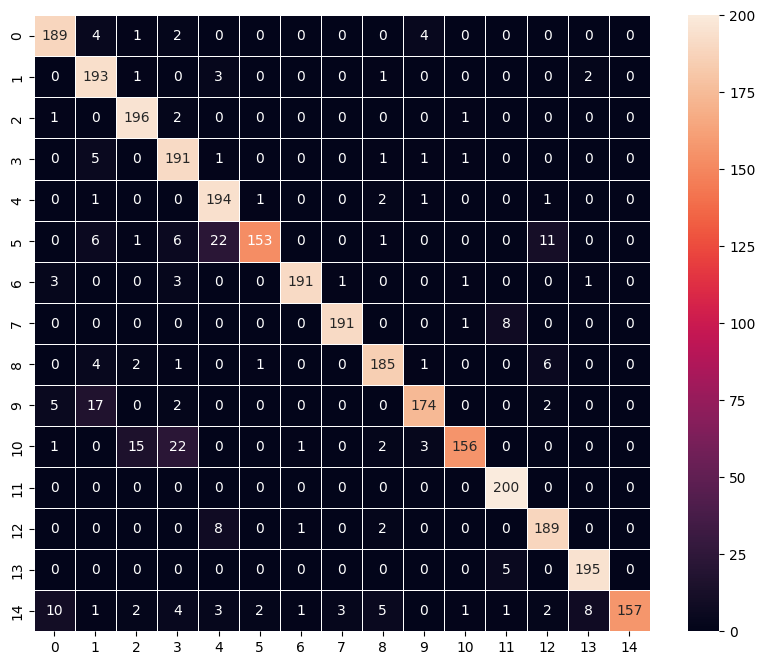

In [17]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Mengkonversi peluang prediksi menjadi kelas
y_pred_class = np.argmax(predictions, axis=1)

# Mendapatkan kelas sebenarnya dari test_data
y_true_class = test_data.classes

# membuat confusion matrix
conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# menampilkan confusion matrix dalam bentuk heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidth=0.5,
    square=True,
)
plt.show()

## MEMBUAT MODEL (DENGAN PRETRAINED MODEL)

## 3.1. Model CNN dengan Model Dasar VGG16

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Membuat base model menggunakan VGG16 pre-trained weights
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Membuat model CNN
model_2 = Sequential()

# Menambahkan base model ke model CNN
model_2.add(base_model)

# Menambahkan layer dense untuk klasifikasi
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(15, activation='softmax'))

# Membekukan parameter pada base model
base_model.trainable = False

# Compile model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melihat ringkasan model
model_2.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,928,015 (68.39 MB)

 Trainable params: 3,213,327 (12.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
# Fit the model
history_2 = model_2.fit(
        train_data,
        validation_data=val_data,
        epochs=5,
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 272s 549ms/step - accuracy: 0.6671 - loss: 1.2763 - val_accuracy: 0.9737 - val_loss: 0.0946
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 239s 510ms/step - accuracy: 0.9445 - loss: 0.1863 - val_accuracy: 0.9707 - val_loss: 0.1066
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 242s 516ms/step - accuracy: 0.9565 - loss: 0.1321 - val_accuracy: 0.9920 - val_loss: 0.0417
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 236s 502ms/step - accuracy: 0.9682 - loss: 0.0996 - val_accuracy: 0.9777 - val_loss: 0.0789
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 236s 504ms/step - accuracy: 0.9672 - loss: 0.1080 - val_accuracy: 0.9920 - val_loss: 0.0344


In [20]:
# menyimpan model hasil pelatihan
model_2.save("model_with_vgg16.keras")

In [21]:
# memuat model hasil pelatihan
my_model_2 = load_model("model_with_vgg16.keras")

## 3.3. Evaluasi dan Prediksi

In [22]:
my_model_2.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.9943 - loss: 0.0242


[0.028193388134241104, 0.9913333058357239]

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step


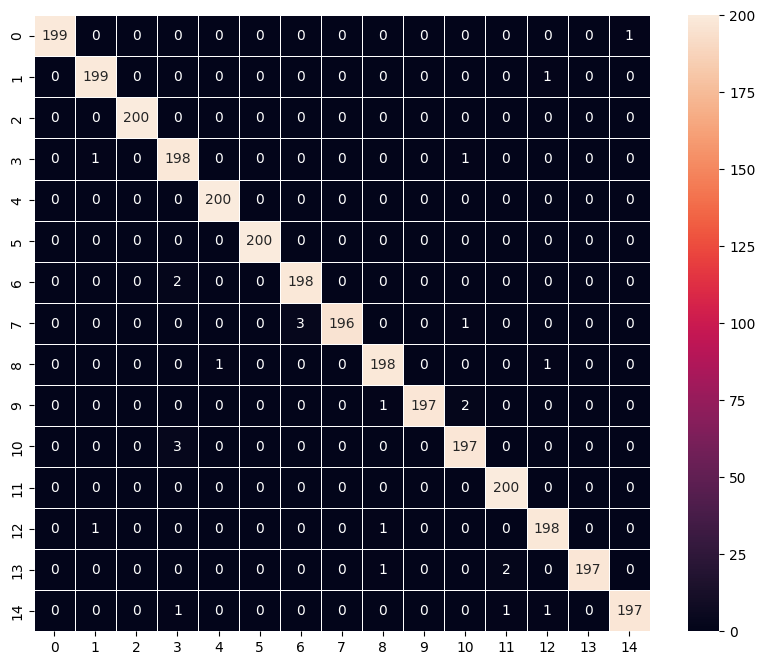

In [23]:
predictions = my_model_2.predict(test_data)
# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_true_class, y_pred_class),
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidth=0.5,
    square=True,
)
plt.show()